## Percolation Model

A model for disordered materials. <br>
Describes a porous material through which certain particles can diffuse (or percolate) if there are continious paths through the pores. <br>
Related to phase transitions, critical phenomena, universality and self-similar fractals. Percolation theory describes the geometry of the randol generated pores. 

Assume that we have an alloy consisting of A atoms and B atoms, where p is the concentration of A atoms, distributed randomly and form a regular crystal lattice together. <br>
Assume that A atoms are magnetic, with a short-range magnetic interaction effective only if 2 A atoms are connected to each other. <br> 
If there is no coupling with the nonmagnetic B atoms, the crystal can only for a magnetic order if there is an infinite network of connected A atoms. <br>
Strictly speaking, phase transitiong only occur in inf systems with a sufficient degree of interconectedness, but phase transition also occurs at a critical concentration of A atoms. <br>
Cluster - a set of A atoms that are connected by their couplings

small p: large no. of small clusters, no overall magnetic ordering <br>
p increases, average size of cluster increases, until starting at a critical p, a cluster extends through the entire crystal<br>
pc - percolation threshold or critical concentration <br>
p>pc: inf clusters coexists with many small clusters <br>
p=1: all sides occupied by A atoms, only one (inf) cluster

square lattice with 4 nearest neighbors: pc = 0.59275 <br>
triangle lattice: pc = 1/2 <br>
pc depends on the lattice type and on the range of couplings <br>
Finite crystal: there is only one probability that a cluster connecting 2 oppposite sides exists <br>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand

Fig shows a pattern w/o structure. We cant easily analse the percolation structure e.g. does it percolates? 
Is there a path containing two opposite faces that only uses occupied sites?


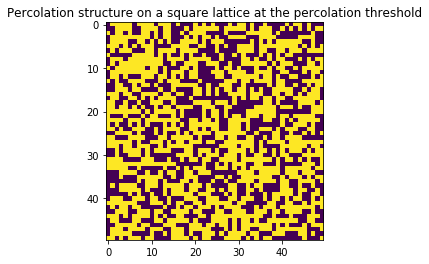

In [16]:
L = 50
p = 0.59275
matrix = np.zeros([L,L], int)

for i in np.arange(L):
    for j in np.arange(L):
        r = np.random.uniform(0,1)
        if r < p:
            matrix[i,j] = 1
print('Fig shows a pattern w/o structure. We cant easily analse the percolation structure e.g. does it percolates? \n'
     'Is there a path containing two opposite faces that only uses occupied sites?'
     'One can only see noise. ')
plt.title('Percolation structure on a square lattice at the percolation threshold')
plt.imshow(matrix)

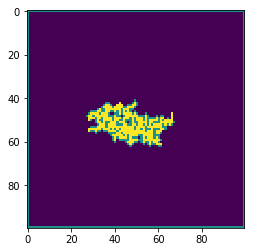

In [61]:
L = 100
p = 0.59275
N = 500
matrix = np.ones([L,L], int)*-1
matrix[:,0] = 0
matrix[:,L-1] = 0
matrix[0,:] = 0
matrix[L-1,:] = 0

c1 = int((L-1)/2)
p1 = matrix[c1,c1]
#let -1 as not defined, 0 as vacant, and 1 as occupied

def iden(plist):
    undeflist = []
    for i in plist:
        if matrix[i[0]+1,i[1]]==-1:
            undeflist.append([i[0]+1,i[1]])
        if matrix[i[0]-1,i[1]]==-1:
            undeflist.append([i[0]-1,i[1]])
        if matrix[i[0],i[1]+1]==-1:
            undeflist.append([i[0],i[1]+1])
        if matrix[i[0],i[1]-1]==-1:
            undeflist.append([i[0],i[1]-1])
        
    return undeflist

def choose(undeflist):
    return undeflist[rand.randrange(0,len(undeflist))]

plist=[[c1,c1]]
for i in range(N):
    r = np.random.uniform(0,1)
    pt = choose(iden(plist))
    
    if r < p:
        matrix[pt[0],pt[1]]=1
        plist.append([pt[0],pt[1]])
    else:
        matrix[pt[0],pt[1]]=0
        
plt.imshow(matrix)

This is an algorithm that can identify clusters of connected particles. 
Figure shows a percolating cluster, which exhibits structure on all length scales, from the lattice constant up to the size of 
the entire lattice. <br>
It is a fractal self-similar object. <br>
The program not only generates perclating clusters. The growth stops before the cluster has reached the edge. <br>
This occurs for p<pc. <br>
For p>pc, percolating clusters are generated almost  exclusively.

In [ ]:
L = 20
p = 0.59275
N = 500
matrix = np.ones([L,L], int)*2
matrix[:,0] = 1
matrix[:,L-1] = 1
matrix[0,:] = 1
matrix[L-1,:] = 1

#let 0 as vacant, and 1 as occupied, 2 as undefined

def iden(list):
    
    

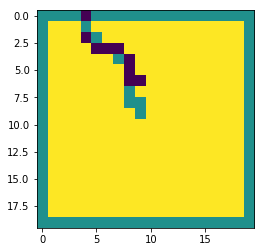

In [44]:
L = 20
p = 0.59275
N = 500
matrix = np.ones([L,L], int)*2
matrix[:,0] = 1
matrix[:,L-1] = 1
matrix[0,:] = 1
matrix[L-1,:] = 1

#let 0 as vacant, and 1 as occupied, 2 as undefined
        
def step(i,j):
    step = rand.randrange(0,4)
    if step == 0:
        i+=1
    elif step == 1:
        i-=1
    elif step == 2:
        j+=1
    elif step == 3:
        j-=1
        
    if matrix[i,j] == 2:
        return i,j
    else:
        return iden(i,j)

c1 = int((L-1)/2)
c2 = c1
matrix[c1,c2] = 1
for i in range(N):
    if (0<c1<(L-1) and 0<c2<(L-1)):
        r = np.random.uniform(0,1)
        c = iden(c1,c2)
        c1 = c[0]
        c2 = c[1]
        if r<p:
            matrix[c1,c2] = 1
        else:
            matrix[c1,c2] = 0
    else:
        break
       

plt.imshow(matrix)
    

In [8]:
p = 0.59275
def iden(i,j):
    step = rand.randrange(0,4)
    r = np.random.uniform(0,1)
    if r < p:
        if step == 0:
            i+=1
        elif step == 1:
            i-=1
        elif step == 2:
            j+=1
        elif step == 3:
            j-=1
    else:
        return iden(i,j)
    return i,j

iden(1,2)[0]


1

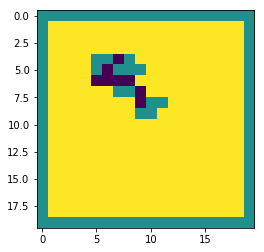

In [55]:
L = 20
p = 0.59275
N = 20
matrix = np.ones([L,L], int)*2
matrix[:,0] = 1
matrix[:,L-1] = 1
matrix[0,:] = 1
matrix[L-1,:] = 1

#let 0 as vacant, and 1 as occupied, 2 as undefined
        
def iden(i,j):
    step = rand.randrange(0,4)
    if step == 0:
        i+=1
    elif step == 1:
        i-=1
    elif step == 2:
        j+=1
    elif step == 3:
        j-=1
        
    if matrix[i,j] == 2:
        return i,j
    else:
        return iden(i,j)

c1 = int((L-1)/2)
c2 = c1
matrix[c1,c2] = 1
for i in range(N):
    if (0<c1<(L-1) and 0<c2<(L-1)):
        r = np.random.uniform(0,1)
        c = iden(c1,c2)
        c1 = c[0]
        c2 = c[1]
        if r<p:
            matrix[c1,c2] = 1
        else:
            matrix[c1,c2] = 0
    else:
        break

plt.imshow(matrix)
       